In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from fastai.data.transforms import get_image_files
from fastai.vision.data import SegmentationDataLoaders
from os import path
from fastseg.image import colorize

In [25]:
base_dir = "/media/nevin/Trash Games1/culane"
test_dir = path.join(base_dir, "test/")
image_files = get_image_files(test_dir)

def label_func(input):
    return f"{test_dir}{input.stem}.lines.txt"

print(label_func(image_files[0]))

/media/nevin/Trash Games1/culane/test/00000.lines.txt


In [32]:
image = image_files[100]
l_file = label_func(image)

# todo, don't write to the actual array or whatever
def get_points(label_file):
    with open(label_file) as file:
        print(file)
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]

    points = [[] for line in lines]
    for idx, line in enumerate(lines):
        split = line.split(" ")
        for i in range(0, len(split), 2):
            points[idx].append([int(float(split[i])), int(float(split[i + 1]))]) # it works
            # print(split[i], split[i + 1])
    
    return np.array(points, dtype=object)

<_io.TextIOWrapper name='/media/nevin/Trash Games1/culane/test/02760.lines.txt' mode='r' encoding='UTF-8'>


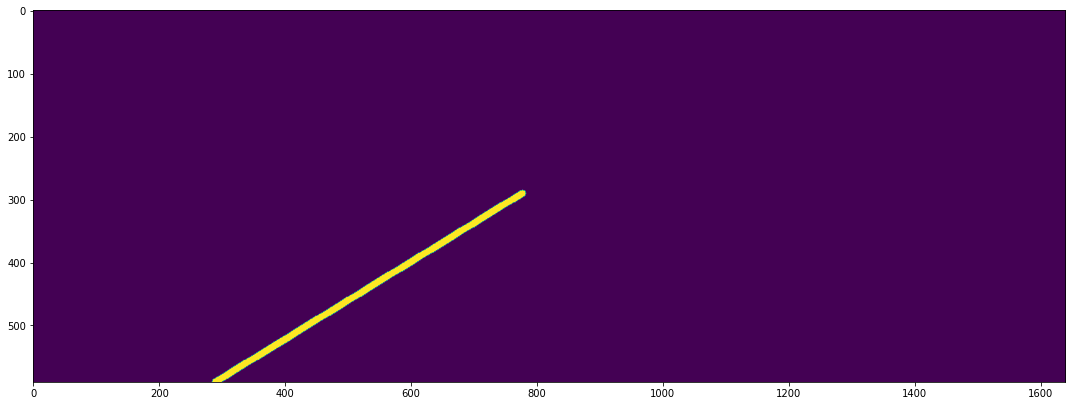

In [51]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

img = cv.imread(str(image))
h, w, c = img.shape

all_points = get_points(l_file)

def gen_seg(image, points):
    seg_image = np.zeros((h, w), np.uint8)
    for i in range(len(points)):
        point = np.asarray(points[i])
        x = point[:, 0]
        y = point[:, 1]

        poly = np.polyfit(x, y, 3)
        poly_y = [np.polyval(poly, i) for i in x]

        draw_points = (np.asarray([x, poly_y]).T).astype(np.int32)
        # print(point)

        seg_image = cv.polylines(seg_image, [draw_points], False, color=(1, 0, 0), thickness=10)

    return seg_image

    # plt.plot(x, poly_y)
    # plt.show()

plt.imshow(gen_seg(img, all_points))

# for point in points:
    # img = cv.circle(img, (point[0], point[1]), radius=2, color=(0, 0, 255), thickness=10)

# plt.imshow(img)

In [4]:
codes = ["lane"]

In [5]:
dls = SegmentationDataLoaders.from_label_func(
    path="/media/nevin/Trash Games1/culane",
    bs=4,
    fnames=images_files,
    label_func=label_func,
)

NameError: name 'images_files' is not defined

In [ ]:
dls[0]